# Deteksi Status Gizi

## Pustaka Yang Digunakan

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Memuat Data

In [44]:
df = pd.read_excel("/home/rmfarizky/Project/deteksi_stunting/Dataset/new_data.xlsx")

## Detail Information

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIK                 624 non-null    object 
 1   Nama                624 non-null    object 
 2   JK                  624 non-null    object 
 3   Tgl Lahir           624 non-null    object 
 4   BB Lahir            624 non-null    object 
 5   TB Lahir            624 non-null    object 
 6   Nama Ortu           624 non-null    object 
 7   Prov                624 non-null    object 
 8   Kab/Kota            624 non-null    object 
 9   Kec                 624 non-null    object 
 10  Pukesmas            624 non-null    object 
 11  Desa/Kel            624 non-null    object 
 12  Posyandu            624 non-null    object 
 13  RT                  624 non-null    object 
 14  RW                  624 non-null    object 
 15  Alamat              624 non-null    object 
 16  Usia Saa

In [46]:
df['Usia Saat Ukur']

0       4 Tahun - 1 Bulan - 3 Hari
1       4 Tahun - 2 Bulan - 2 Hari
2       4 Tahun - 8 Bulan - 0 Hari
3       1 Tahun - 9 Bulan - 0 Hari
4       4 Tahun - 7 Bulan - 7 Hari
                  ...             
619    0 Tahun - 2 Bulan - 23 Hari
620    1 Tahun - 0 Bulan - 15 Hari
621    3 Tahun - 4 Bulan - 29 Hari
622     1 Tahun - 7 Bulan - 1 Hari
623    4 Tahun - 0 Bulan - 17 Hari
Name: Usia Saat Ukur, Length: 624, dtype: object

# Preprocessing

## Data Cleaning

### Drop unused columns

In [47]:
df = df.drop(columns=['NIK','Nama','Tgl Lahir', 'BB Lahir', 'TB Lahir', 'Nama Ortu', 
                      'Prov', 'Kab/Kota','Kec','Pukesmas','Desa/Kel', 'Posyandu','RT', 'RW', 'Alamat','Naik Berat Badan', 
                      'PMT Diterima (kg)', 'Jml Vit A', 'KPSP','KIA', 'Tanggal Pengukuran'])

### Drop Missing Value

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JK              624 non-null    object 
 1   Usia Saat Ukur  624 non-null    object 
 2   Berat           624 non-null    float64
 3   Tinggi          624 non-null    float64
 4   LiLA            624 non-null    float64
 5   BB/U            624 non-null    object 
 6   ZS BB/U         624 non-null    float64
 7   TB/U            622 non-null    object 
 8   ZS TB/U         624 non-null    float64
 9   BB/TB           622 non-null    object 
 10  ZS BB/TB        624 non-null    float64
dtypes: float64(6), object(5)
memory usage: 53.8+ KB


In [49]:
df.dropna(subset=['TB/U','BB/TB'], axis=0, inplace=True)

In [50]:
df.rename(columns={'Usia Saat Ukur':'usia ukur'}, 
        inplace=True)

### Ganti Unique Value

In [51]:
df['BB/U'].unique()

array(['Sangat Kurang', 'Normal', 'Lebih', 'Kurang', 'Berat Badan Normal',
       'Risiko Lebih'], dtype=object)

In [52]:
print(df['BB/U'][df['BB/U'] == 'Berat Badan Normal'].count())

454


In [53]:
df['BB/U'][df['BB/U'] == 'Berat Badan Normal'] = 'Normal'

/tmp/ipykernel_292/1284860579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BB/U'][df['BB/U'] == 'Berat Badan Normal'] = 'Normal'


In [54]:
df['BB/TB'].unique()

array(['Gizi Buruk', 'Obesitas', 'Gizi Baik', 'Gizi Lebih',
       'Resiko Gizi Lebih', 'Gizi Kurang', 'Risiko Gizi Lebih'],
      dtype=object)

In [55]:
print(df['BB/TB'][df['BB/TB'] == 'Resiko Gizi Lebih'].count())

4


In [56]:
df['BB/TB'][df['BB/TB'] == 'Resiko Gizi Lebih'] = 'Risiko Gizi Lebih'

/tmp/ipykernel_292/1775700666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BB/TB'][df['BB/TB'] == 'Resiko Gizi Lebih'] = 'Risiko Gizi Lebih'


In [57]:
df['JK'].unique()

array(['P', 'L', 'L\xa0', 'P\xa0'], dtype=object)

In [58]:
print(df['JK'][df['JK'] == 'L\xa0'].count())
print(df['JK'][df['JK'] == 'P\xa0'].count())

306
294


In [59]:
df['JK'][df['JK'] == 'L\xa0'] = 'L'
df['JK'][df['JK'] == 'P\xa0'] = 'P'

/tmp/ipykernel_292/64729990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JK'][df['JK'] == 'L\xa0'] = 'L'
/tmp/ipykernel_292/64729990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JK'][df['JK'] == 'P\xa0'] = 'P'


In [60]:
df['BB/U'].unique()

array(['Sangat Kurang', 'Normal', 'Lebih', 'Kurang', 'Risiko Lebih'],
      dtype=object)

In [61]:
print(df['BB/U'][df['BB/U'] == 'Lebih'].count())

5


In [62]:
df['BB/U'][df['BB/U'] == 'Lebih'] = 'Risiko Lebih'

/tmp/ipykernel_292/343919613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BB/U'][df['BB/U'] == 'Lebih'] = 'Risiko Lebih'


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 0 to 623
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   JK         622 non-null    object 
 1   usia ukur  622 non-null    object 
 2   Berat      622 non-null    float64
 3   Tinggi     622 non-null    float64
 4   LiLA       622 non-null    float64
 5   BB/U       622 non-null    object 
 6   ZS BB/U    622 non-null    float64
 7   TB/U       622 non-null    object 
 8   ZS TB/U    622 non-null    float64
 9   BB/TB      622 non-null    object 
 10  ZS BB/TB   622 non-null    float64
dtypes: float64(6), object(5)
memory usage: 58.3+ KB


### Transformasi Usia Ukur diubah ke format Bulan

In [64]:
def usia_to_months(age_str):
    age_list = age_str.split(' ')
    total_months = int(age_list[0]) * 12 + int(age_list[3])  # Tahun * 12 + Bulan
    return total_months

In [65]:
df['usia ukur'] = df['usia ukur'].apply(usia_to_months)

### Transformasi Jenis Kelamin

In [66]:
def Encoded_Col(i_df):
    # Mengurutkan ulang label secara alfabetis
    sorted_labels = sorted(df[i_df].unique())

    # Membuat dictionary untuk menyimpan keterangan encode baru
    encode_labels_new = {}

    # Melakukan encoding ulang dengan label yang berurutan
    for i, label in enumerate(sorted_labels):
        encode_labels_new[label] = i
        df.loc[df[i_df] == label, i_df] = i

    # # Menyimpan data setelah encode ulang
    # df.to_csv('data_encode_ulang.csv', index=False)
    # Menampilkan keterangan encode dan jumlah baris per target setelah encode ulang
    for target_label, target_encode in encode_labels_new.items():
        count_after = df[df[i_df] == target_encode].shape[0]
        print("Target Label:", target_label)
        print("Encode Label:", target_encode)
        print("Jumlah Baris:", count_after)
        print()

In [67]:
Encoded_Col('JK')

Target Label: L
Encode Label: 0
Jumlah Baris: 314

Target Label: P
Encode Label: 1
Jumlah Baris: 308



# Exploratory Data Analysis

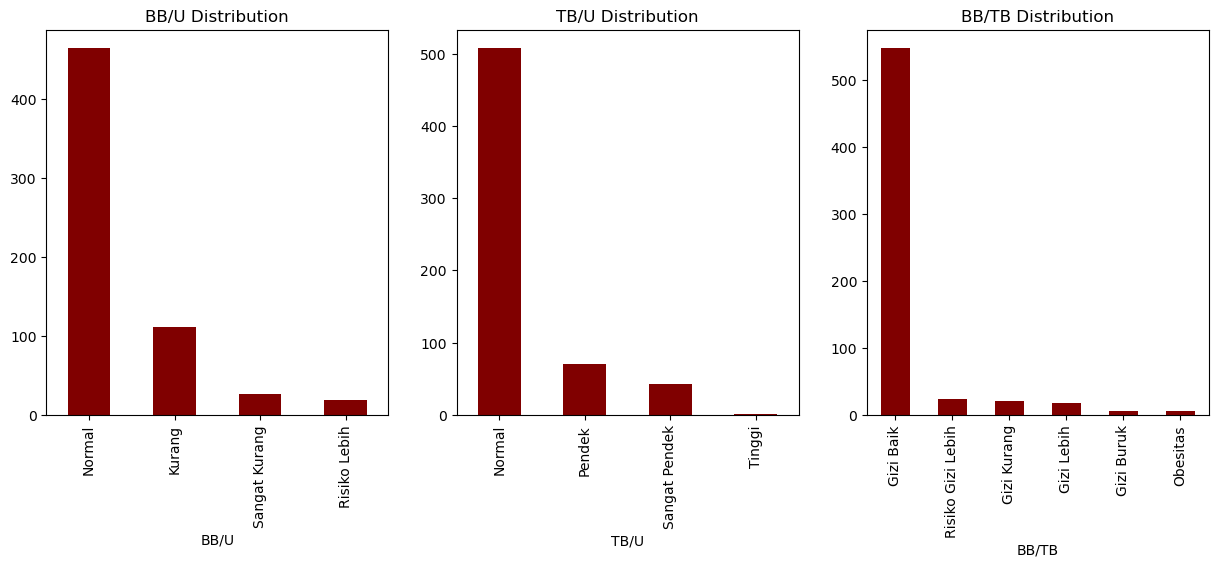

In [68]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df['BB/U'].value_counts().plot.bar(color='maroon', ax=axs[0])
axs[0].set_title('BB/U Distribution')

df['TB/U'].value_counts().plot.bar(color='maroon', ax=axs[1])
axs[1].set_title('TB/U Distribution')

df['BB/TB'].value_counts().plot.bar(color='maroon', ax=axs[2])
axs[2].set_title('BB/TB Distribution')

plt.show()


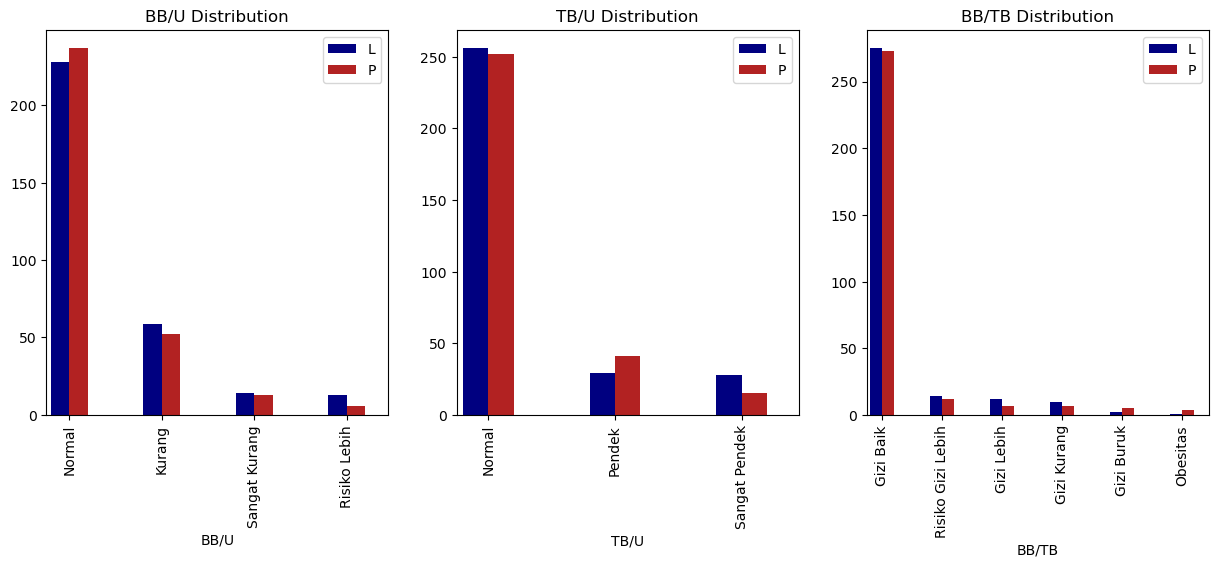

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df[df['JK'] == 0]['BB/U'].value_counts().plot.bar(color='navy', position=1, width=0.2, label='L', ax=axs[0])
df[df['JK'] == 1]['BB/U'].value_counts().plot.bar(color='firebrick', position=0, width=0.2, label='P', ax=axs[0])
axs[0].set_title('BB/U Distribution')
axs[0].legend()

df[df['JK'] == 0]['TB/U'].value_counts().plot.bar(color='navy', position=1, width=0.2, label='L', ax=axs[1])
df[df['JK'] == 1]['TB/U'].value_counts().plot.bar(color='firebrick', position=0, width=0.2, label='P', ax=axs[1])
axs[1].set_title('TB/U Distribution')
axs[1].legend()

df[df['JK'] == 0]['BB/TB'].value_counts().plot.bar(color='navy', position=1, width=0.2, label='L', ax=axs[2])
df[df['JK'] == 1]['BB/TB'].value_counts().plot.bar(color='firebrick', position=0, width=0.2, label='P', ax=axs[2])
axs[2].set_title('BB/TB Distribution')
axs[2].legend()



In [70]:
df = df[['JK','usia ukur', 'Berat', 'Tinggi', 'ZS BB/U', 'ZS TB/U', 'ZS BB/TB', 'BB/U', 'TB/U', 'BB/TB']]

In [71]:
df.head()

,JK,usia ukur,Berat,Tinggi,ZS BB/U,ZS TB/U,ZS BB/TB,BB/U,TB/U,BB/TB
0,1,49,13.3,97.0,-3.66,-2.99,-3.05,Sangat Kurang,Pendek,Gizi Buruk
1,1,50,15.0,99.7,-3.36,-2.24,-3.18,Sangat Kurang,Pendek,Gizi Buruk
2,1,56,12.6,96.5,0.54,-3.33,3.11,Normal,Sangat Pendek,Obesitas
3,0,21,11.5,79.5,2.55,0.85,3.04,Risiko Lebih,Normal,Obesitas
4,1,55,15.4,108.0,-3.43,-1.69,-3.62,Sangat Kurang,Normal,Gizi Buruk


# Splitting Data

In [72]:
X = df[df.columns[:-3]]
y = df[df.columns[-3:]]
X, y = np.array(X), np.array(y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                 test_size=0.3, random_state=42)

In [79]:
for i in range (50,500+1,50):
    print(i)

50
100
150
200
250
300
350
400
450
500


# Random Forest

In [193]:
RF_model = RandomForestClassifier(n_estimators = 150)
RF_multi_target = MultiOutputClassifier(RF_model, n_jobs=-1)
RF_multi_target.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=150),
                      n_jobs=-1)

In [194]:
RF_multi_target.score(X_test,y_test)

0.9625668449197861

## Predict

In [195]:
rf_pred = RF_multi_target.predict(X_test)

for i in range(3):
    print(classification_report(y_test.T[i], rf_pred.T[i]))

               precision    recall  f1-score   support

       Kurang       0.94      1.00      0.97        32
       Normal       1.00      1.00      1.00       140
 Risiko Lebih       1.00      1.00      1.00         6
Sangat Kurang       1.00      0.78      0.88         9

     accuracy                           0.99       187
    macro avg       0.99      0.94      0.96       187
 weighted avg       0.99      0.99      0.99       187

               precision    recall  f1-score   support

       Normal       0.99      1.00      1.00       149
       Pendek       1.00      1.00      1.00        20
Sangat Pendek       1.00      1.00      1.00        17
       Tinggi       0.00      0.00      0.00         1

     accuracy                           0.99       187
    macro avg       0.75      0.75      0.75       187
 weighted avg       0.99      0.99      0.99       187

                   precision    recall  f1-score   support

        Gizi Baik       1.00      1.00      1.00      

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

---
# Naive Bayes

In [196]:
nb_model = GaussianNB() 
nb_multi_target = MultiOutputClassifier(nb_model, n_jobs=-1)
nb_multi_target.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB(), n_jobs=-1)

In [197]:
nb_multi_target.score(X_test,y_test)

0.8181818181818182

## Predict

In [202]:
nb_pred = nb_multi_target.predict(X_test)

for i in range(3):
    print(classification_report(y_test.T[i], nb_pred.T[i]))

               precision    recall  f1-score   support

       Kurang       0.86      0.97      0.91        32
       Normal       0.99      0.95      0.97       140
 Risiko Lebih       0.75      1.00      0.86         6
Sangat Kurang       1.00      1.00      1.00         9

     accuracy                           0.96       187
    macro avg       0.90      0.98      0.93       187
 weighted avg       0.96      0.96      0.96       187

               precision    recall  f1-score   support

       Normal       0.95      0.99      0.97       149
       Pendek       0.68      0.65      0.67        20
Sangat Pendek       1.00      0.76      0.87        17
       Tinggi       0.00      0.00      0.00         1

     accuracy                           0.93       187
    macro avg       0.66      0.60      0.63       187
 weighted avg       0.92      0.93      0.92       187

                   precision    recall  f1-score   support

        Gizi Baik       0.98      0.96      0.97      

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# Decision Tree

In [212]:
DT_model = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=3, min_samples_leaf=1, max_features=None)
DT_multi_target = MultiOutputClassifier(DT_model, n_jobs=-1)
DT_multi_target.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                       min_samples_split=3),
                      n_jobs=-1)

In [213]:
DT_multi_target.score(X_test,y_test)

0.9732620320855615

## Predict

In [214]:
dt_pred = RF_multi_target.predict(X_test)

for i in range(3):
    print(classification_report(y_test.T[i], dt_pred.T[i]))

               precision    recall  f1-score   support

       Kurang       0.94      1.00      0.97        32
       Normal       1.00      1.00      1.00       140
 Risiko Lebih       1.00      1.00      1.00         6
Sangat Kurang       1.00      0.78      0.88         9

     accuracy                           0.99       187
    macro avg       0.99      0.94      0.96       187
 weighted avg       0.99      0.99      0.99       187

               precision    recall  f1-score   support

       Normal       0.99      1.00      1.00       149
       Pendek       1.00      1.00      1.00        20
Sangat Pendek       1.00      1.00      1.00        17
       Tinggi       0.00      0.00      0.00         1

     accuracy                           0.99       187
    macro avg       0.75      0.75      0.75       187
 weighted avg       0.99      0.99      0.99       187

                   precision    recall  f1-score   support

        Gizi Baik       1.00      1.00      1.00      

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le